## Import Keras and other Libraries 

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Set the dataset and model paths

In [2]:
trainPath = 'dataset/train/'
valPath = 'dataset/val/'
testPath = 'dataset/test/'
MODEL_PATH = 'Models/beeWaspCNNBest.json'
WEIGHTS_PATH = 'Models/beeWaspWeightsBest.h5'

In [3]:
import h5py
def loadModel(modelPath):
    json_file = open(modelPath,'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = keras.models.model_from_json(loaded_model_json)
    return loaded_model
# Use loaded_model.load_weights("pathToWeightsFile.h5")

def saveModel(model,savePath):
    model_json = model.to_json()
    with open(savePath,'w') as f:
        f.write(model_json)
# To save weights use model.save_weights("model.h5")

## Load data and apply Data Augmentation  

In [4]:
SHAPE = (128,128)
BATCH_SIZE = 32
trainDatagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=45,
    horizontal_flip = True,
    zoom_range=0.2,
)
trainGenerator = trainDatagen.flow_from_directory(
    trainPath,
    target_size=SHAPE,
    class_mode = 'categorical',
    batch_size=BATCH_SIZE
)
valDatagen = ImageDataGenerator(
    rescale=1./255
)
valGenerator = valDatagen.flow_from_directory(
    valPath,
    target_size=SHAPE,
    class_mode = 'categorical',
    batch_size=BATCH_SIZE
)
testGenerator = valDatagen.flow_from_directory(
    testPath,
    target_size=SHAPE,
    class_mode = 'categorical',
    batch_size=BATCH_SIZE
)

Found 7939 images belonging to 4 classes.
Found 1719 images belonging to 4 classes.
Found 1763 images belonging to 4 classes.


In [5]:
(x,y) = trainGenerator.next()

[1. 0. 0. 0.]


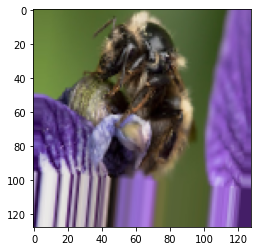

In [6]:
index = 16
print(y[index])
plt.imshow(x[index])


In [7]:
model = keras.models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=list(SHAPE)+[3],kernel_regularizer=keras.regularizers.L2(0.08)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_regularizer=keras.regularizers.L2(0.08)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=98,kernel_size=(3,3),activation='relu',kernel_regularizer=keras.regularizers.L2(0.08)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_regularizer=keras.regularizers.L2(0.08)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',kernel_regularizer=keras.regularizers.L2(0.08)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.6),
    layers.Dense(40,activation='relu'),
    layers.Dense(4,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 98)        5

In [30]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(lr=1e-6),metrics=['acc'])

In [36]:
history = model.fit(trainGenerator,validation_data = valGenerator,epochs=120,initial_epoch=100)

Epoch 101/120
249/249 [==============================] - 38s 155ms/step - loss: 0.3852 - acc: 0.8878 - val_loss: 0.4623 - val_acc: 0.8615
Epoch 102/120
249/249 [==============================] - 39s 155ms/step - loss: 0.3789 - acc: 0.8917 - val_loss: 0.4628 - val_acc: 0.8627
Epoch 103/120
249/249 [==============================] - 38s 154ms/step - loss: 0.3736 - acc: 0.8932 - val_loss: 0.4623 - val_acc: 0.8627
Epoch 104/120
249/249 [==============================] - 39s 155ms/step - loss: 0.3811 - acc: 0.8893 - val_loss: 0.4615 - val_acc: 0.8615
Epoch 105/120
249/249 [==============================] - 39s 155ms/step - loss: 0.3823 - acc: 0.8929 - val_loss: 0.4682 - val_acc: 0.8633
Epoch 106/120
249/249 [==============================] - 39s 156ms/step - loss: 0.3859 - acc: 0.8907 - val_loss: 0.4684 - val_acc: 0.8645
Epoch 107/120
249/249 [==============================] - 39s 156ms/step - loss: 0.3874 - acc: 0.8881 - val_loss: 0.4582 - val_acc: 0.8656
Epoch 108/120
249/249 [===========

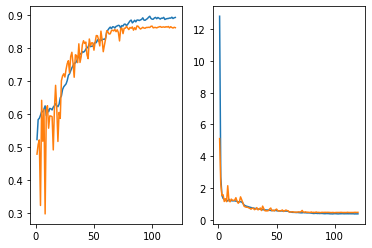

In [37]:
trainAcc += history.history['acc']
trainLoss += history.history['loss']
valAcc += history.history['val_acc']
valLoss += history.history['val_loss']
epochs = np.arange(1, len(trainAcc)+1)

plt.subplot(1,2,1)
plt.plot(epochs,trainAcc)
plt.plot(epochs,valAcc)
plt.subplot(1,2,2)
plt.plot(epochs,trainLoss)
plt.plot(epochs,valLoss)

In [38]:
model.evaluate(testGenerator)

56/56 [==============================] - 3s 51ms/step - loss: 0.4655 - acc: 0.8605


[0.4654863476753235, 0.8604651093482971]

### Thus the test accuracy after 120 epochs is around 86%. Using much more complex CNN architectures, this accuracy we might be able to increase the accuracy. 

## Saving the model

In [176]:
saveModel(model,'beeWaspCNN.json')
model.save_weights('beeWaspWeights.h5')

## Loading the saved model and its weights

In [187]:
loaded_model = loadModel(MODEL_PATH)
loaded_model.load_weights(WEIGHTS_PATH)
loaded_model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10_input (InputLayer) [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 64)      